# Project: Decision Trees


## Programming project: real estate assesment evaluation

Home valuation is key in real estate industry, and also the basis for mortgages in credit sector. Here we have to predict the estimated value of a property.


Data (*Regression_Supervised_Train_reduced.csv*) consist of a list of features plus the resulting $parcelvalue$, described in *Case_data_dictionary.xlsx* file. Each row corresponds to a particular home valuation, and $transactiondate$ is the date when the property was effectively sold. Properties are defined by $lotid$, but be aware that one property can be sold more than once (it's not the usual case). Also notice that some features are sometime empty, your model has to deal with it.

Note that you don't have to use $totaltaxvalue$, $buildvalue$ or $landvalue$, because they are closely correlated with the final value to predict.

+ Using this data build a predictive model for $parcelvalue$. Should be one belonging to the decision trees family of models (random forest, adaboost, gbm, xgboost, etc.).
+ Try a first quick implementation, then try to optimize hyperparameters
+ If you have computational problems, try in-class a first version with half of the observations. Remember to paralellize when possible (*n_jobs* parameter).
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the MSE estimate on the test data once released.
+ Bonus: Try an approach to fill NA without removing features or observations, and check improvements.
+ Extra bonus: Try to do a final model that as an ensemble of different decision trees models (e.g. random forest, xgboost, GBM ...), and even including models from another families (SVM, kNN).


You can follow those **steps** in your first implementation:
1. *Explore* and understand the dataset. Report missing data
2. As a simplified initial version, get rid of *missing data* by:
    + Removing features that have more than 40% of missing data
    + After that, removing observations that have missing data
3. Create *dummy variables* for relevant categorical features
4. *Build* your model and test it on the same input data.
5. Assess expected accuracy using *cross-validation*
6. Try to assess variable *importance*
7. Prepare the code to *run* on a new input file and be able to report accuracy, following same preparation steps (missing data, dummies, etc)

You may want to iterate to refine some of these steps once you get performance results in step 5.

**Warning**: Please, to proceed to step 7, first *dump* your model to a file, and load it again from there. Then, remember to share with me not only the notebook, but also the dump file. Here you have an example using package *pickle*.

```python
    # generate model
    my_model= SVC(C=100, probability=True, gamma='scale')
    my_model.fit(xtrain,ytrain)
    
    # save model
    filename = 'stacking_model.sav'
    pickle.dump(my_model, open(filename, 'wb'))

    # load the model from disk and use it
    loaded_model = pickle.load(open(filename, 'rb'))
    loaded_model.predict_proba(xtest)

```

## Step 1: Read and explore data, report missing data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pylab as plt

In [2]:
#import the data
data = pd.read_csv('Regression_Supervised_Train_reduced.csv')

In [3]:
#Understand the size of the data set
data.shape

(24755, 48)

In [4]:
#Initial overview of the data
data.describe()

lotid     logerror       aircond       style     basement  \
count  2.475500e+04  1763.000000  14464.000000  233.000000    56.000000   
mean   1.335009e+07     0.012562      2.107232    7.141631   636.839286   
std    3.444823e+06     0.129091      3.384228    2.051415   488.847319   
min    1.071173e+07    -0.605100      1.000000    2.000000    68.000000   
25%    1.108076e+07    -0.026479      1.000000    7.000000   255.000000   
50%    1.212766e+07     0.005000      1.000000    7.000000   556.000000   
75%    1.467828e+07     0.036462      1.000000    7.000000   929.250000   
max    1.629608e+08     2.489000     13.000000   21.000000  2485.000000   

            numbath    numbedroom  classbuild  qualitybuild  decktype  ...  \
count  24755.000000  24755.000000   18.000000  14654.000000     712.0  ...   
mean       2.603514      3.297637    3.833333      5.640235      66.0  ...   
std        1.045068      1.072567    0.383482      2.251645       0.0  ...   
min        0.000000      0.000000    3.000000      1.000000      66.0  ...   
25%        2.000000      3.000000    4.000000      4.000000      66.0  ...   
50%        2.500000      3.000000    4.000000      6.000000      66.0  ...   
75%        3.000000      4.000000    4.000000      7.000000      66.0  ...   
max       19.000000     11.000000    4.000000     12.000000      66.0  ...   

            unitnum          year   numstories    buildvalue   parcelvalue  \
count  14761.000000  24743.000000  9634.000000  2.475200e+04  2.475500e+04   
mean       1.006300   1972.886473     1.540378  2.382736e+05  5.430185e+05   
std        0.123305     18.745019     0.531651  2.928330e+05  7.259855e+05   
min        1.000000   1880.000000     1.000000  1.010000e+02  1.562300e+04   
25%        1.000000   1961.000000     1.000000  1.141252e+05  2.396560e+05   
50%        1.000000   1974.000000     2.000000  1.725460e+05  3.842500e+05   
75%        1.000000   1986.000000     2.000000  2.631998e+05  6.090000e+05   
max        9.000000   2016.000000     3.000000  1.023363e+07  2.563981e+07   

            taxyear     landvalue  totaltaxvalue  taxdelinquencyyear  \
count  24755.000000  2.475500e+04   24754.000000          886.000000   
mean    2015.281761  3.047738e+05    6665.055184           13.969526   
std        0.449867  4.930763e+05    8999.000816            1.523517   
min     2015.000000  1.300000e+02      49.080000            6.000000   
25%     2015.000000  9.468850e+04    3042.225000           14.000000   
50%     2015.000000  1.936930e+05    4744.815000           14.500000   
75%     2016.000000  3.548305e+05    7387.355000           15.000000   
max     2016.000000  2.430208e+07  311386.080000           15.000000   

          mypointer  
count  24755.000000  
mean   17672.183559  
std    10215.193608  
min        1.000000  
25%     8850.500000  
50%    17660.000000  
75%    26537.500000  
max    35363.000000  

[8 rows x 44 columns]

### 1.1. Initial exploration of the variable of interest (*parcel value*)

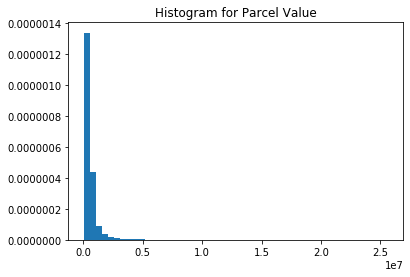

In [5]:
plt.hist(data.parcelvalue, density = True, bins = 50)
plt.title('Histogram for Parcel Value')
plt.show()

From this initial histogram we can see that we are dealing with highly skewed data. Prediction is going to do be difficult if we do not thing of a sound strategy to deal with this. A first approach could be to transform the variable with the $\log$ function.

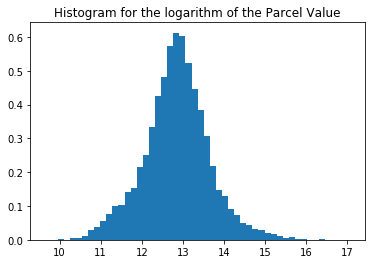

In [6]:
plt.hist(np.log(data.parcelvalue), density = True, bins = 50)
plt.title('Histogram for the logarithm of the Parcel Value')
plt.show()

With this simple transformation we now have a distribution of the parcel value that is not skewed and appears to be gaussian.

### 1.2. Exploration of missing data

In [7]:
#Exploring the pressence of missing values (as a percentage of all the observartions)
missing = data.isna().sum()/data.shape[0]

In [8]:
missing

lotid                 0.000000
logerror              0.928782
transactiondate       0.928782
aircond               0.415714
style                 0.990588
basement              0.997738
numbath               0.000000
numbedroom            0.000000
classbuild            0.999273
qualitybuild          0.408039
decktype              0.971238
finishedarea1st       0.751848
finishedarea          0.002545
perimeterarea         1.000000
totalarea             0.997495
finishedareaEntry     0.751848
countycode            0.000000
numfireplace          0.000000
numfullbath           0.001454
garagenum             0.596284
garagearea            0.596284
tubflag               0.949707
heatingtype           0.362189
latitude              0.000000
longitude             0.000000
lotarea               0.028641
poolnum               0.486124
poolarea              0.951283
citycode              0.001252
countycode2           0.000000
neighborhoodcode      0.392971
regioncode            0.000081
roomnum 

Lets build a function to make this output more understandable.

In [9]:
def missing_report(df, low=0.15, medium=0.35):
    """Function for creating a simple report on the presence of missing values 
    of a data set ussing the thresholds provided as parameters
    """
    
    #create series with percentage of missing values per column
    missing = df.isna().sum()/df.shape[0]
    
    #1. features with no missing values
    no_nas = missing[missing == 0]
    
    print('\n **************************************************************************************** \n', 
          '                 ', 'Features with no missing values: ', len(no_nas), '                  ',
          '\n ****************************************************************************************')
    
    #2. features with 'low' number of missing values
    low_nas = missing[(missing <= low) & (missing > 0)]
    
    print('\n **************************************************************************************** \n', 
          '      ', 'Features with ', low*100, '% or less missing values: ', len(low_nas), '        ',
          '\n ****************************************************************************************')
    
    #3. features with 'medium' number of missing values
    medium_nas = missing[(missing <= medium) & (missing > low)]
    
    print('\n **************************************************************************************** \n', 
          ' ', 'Features with missing values between', low*100, '% and ', medium*100, '% : ', len(medium_nas),' ',
          '\n ****************************************************************************************')
    
    if len(medium_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(medium_nas.index, medium_nas)
        plt.title('Features with medium number of missing values')
        plt.show()
    
    #4. features with 'large' number of missing values
    large_nas = missing[(missing >= medium)]
    
    print('\n **************************************************************************************** \n', 
          'WARNING: ', 'Features with ', medium*100, '% or more missing values: ', len(large_nas), '        ',
          '\n ****************************************************************************************')
    
    if len(large_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(large_nas.index, large_nas)
        plt.title('Features with large number of missing values')
        plt.show()
    


 **************************************************************************************** 
                   Features with no missing values:  13                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  8          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


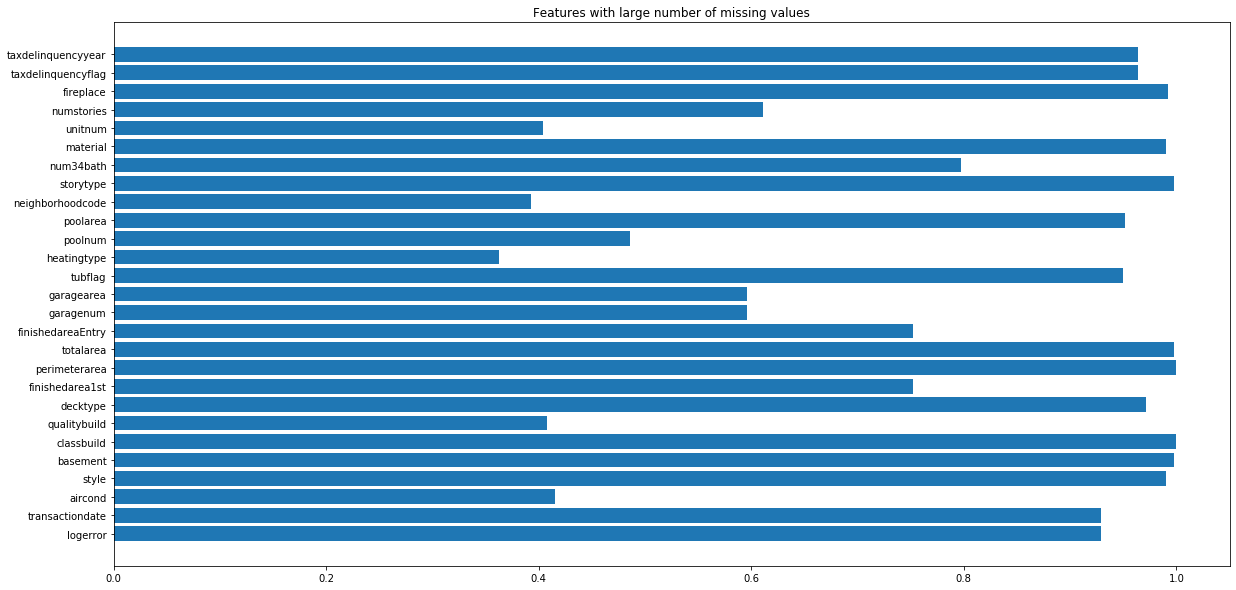

In [10]:
missing_report(data)

Missing values are clearly an important issue that deserves consideration for this dataset. We will do this in the following step.

## Step 2: Remove features with missing data, and then observations with missing data

Dealing with missing data is difficult. It is not always clear when a feature has such a low amount of available data that maybe it is not worth considering. We will try an approach that uses different tools to deal with missing data hoping that it does a sensible job. The steps to clean the data will be the following:

1. Remove the features with more than 80% of missing data. It seems that whatever we do with these features we would be introducing very noisy measures.
2. Use sklearn IterativeImputer to impute the rest of the missing data.
3. Test how results change if we use a different threshold for removing features.

### Step 2.1. : Handling features with a really high percentage of missing values (> 80%)

In [11]:
#lets start by making a copy of the data
df = data.copy()

In [12]:
# Lets try with 80%
high_missing = df.columns[missing > 0.8]

In [13]:
len(high_missing)

15

In [14]:
df2 = df.drop(axis=1,labels = high_missing)

In [15]:
df2.shape

(24755, 33)

By dropping these features we have now reduce our dataset to 33 features. This is potentially good because we will be shortly introducing new varibles when creating dummies and categorical features.

### Step 2.2. Imputing missing data

I tried to imputting missing data using the IterativeImputer from sklearn. However, I found that it could to interpret the results of the imputation since most of the variables are categorical and the imputer is going to give values really different from the categories 'allowed'. For this reason, I will pursue a simpler apporach using SimpleImputer.

In [16]:
# explicitly require this experimental feature
#from sklearn.experimental import enable_iterative_imputer
# now we can import normally from sklearn.impute
#from sklearn.impute import IterativeImputer
#imputer = IterativeImputer(initial_strategy = 'median', random_state = 92)
#imputer
#df_imp = imputer.fit_transform(df2)

In [17]:
from sklearn.impute import SimpleImputer
simp_imputer = SimpleImputer(strategy = 'median')
simp_imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [18]:
df_imp = simp_imputer.fit_transform(df2)

In [19]:
df_imp.shape

(24755, 33)

In [20]:
#reconvert the imputed data into a pandas DataFrame
df_imp = pd.DataFrame(df_imp, columns = df2.columns)

In [21]:
df_imp

lotid  aircond  numbath  numbedroom  qualitybuild  \
0      17214744.0      1.0      2.0         3.0           6.0   
1      12018724.0      1.0      2.0         1.0           4.0   
2      11306699.0      1.0      3.0         4.0           4.0   
3      11047729.0      1.0      2.0         3.0           7.0   
4      17174848.0      1.0      3.0         2.0           6.0   
...           ...      ...      ...         ...           ...   
24750  11633053.0      1.0      3.0         2.0           7.0   
24751  10751511.0      1.0      2.0         2.0           7.0   
24752  10719915.0      1.0      2.0         4.0           6.0   
24753  11639212.0      1.0      5.0         5.0          10.0   
24754  17273307.0      1.0      2.0         3.0           6.0   

       finishedarea1st  finishedarea  finishedareaEntry  countycode  \
0               1255.0        1255.0             1255.0      6111.0   
1               1300.0        1033.0             1301.0      6037.0   
2               1300.0        2982.0             1301.0      6037.0   
3               1300.0        1757.0             1301.0      6037.0   
4               1047.0        1951.0             1047.0      6111.0   
...                ...           ...                ...         ...   
24750           1300.0        1382.0             1301.0      6037.0   
24751           1300.0        1127.0             1301.0      6037.0   
24752           1300.0        2179.0             1301.0      6037.0   
24753           1300.0        3807.0             1301.0      6037.0   
24754           1308.0        1308.0             1308.0      6111.0   

       numfireplace  ...  num34bath  unitnum    year  numstories  buildvalue  \
0               1.0  ...        1.0      1.0  1979.0         1.0    103993.0   
1               0.0  ...        1.0      1.0  1973.0         2.0    129428.0   
2               0.0  ...        1.0      1.0  2004.0         2.0    175069.0   
3               0.0  ...        1.0      1.0  1952.0         2.0    162926.0   
4               0.0  ...        1.0      1.0  1988.0         2.0    180532.0   
...             ...  ...        ...      ...     ...         ...         ...   
24750           0.0  ...        1.0      1.0  1982.0         2.0    214623.0   
24751           0.0  ...        1.0      1.0  1973.0         2.0     96981.0   
24752           0.0  ...        1.0      1.0  1962.0         2.0    102310.0   
24753           0.0  ...        1.0      1.0  1923.0         2.0    693832.0   
24754           1.0  ...        1.0      1.0  1964.0         1.0     42794.0   

       parcelvalue  taxyear  landvalue  totaltaxvalue  mypointer  
0         142212.0   2015.0    38219.0        1715.08    25711.0  
1         301141.0   2015.0   171713.0        3851.88    13268.0  
2         235062.0   2015.0    59993.0        3818.24     5423.0  
3         270543.0   2015.0   107617.0        3450.67    26198.0  
4         300886.0   2015.0   120354.0        3394.26    25187.0  
...            ...      ...        ...            ...        ...  
24750     786817.0   2016.0   572194.0        9550.24     8421.0  
24751     282464.0   2015.0   185483.0        4086.50    29610.0  
24752     419389.0   2016.0   317079.0        5259.98    17317.0  
24753    3437492.0   2015.0  2743660.0       40656.13     6587.0  
24754      61103.0   2015.0    18309.0        2296.28    19286.0  

[24755 rows x 33 columns]

In [22]:
#verify that we no longer have missing data left
missing_report(df_imp)


 **************************************************************************************** 
                   Features with no missing values:  33                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  0          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


In [23]:
#copy of the final df after imputation
df_final = df_imp.copy()

## Step 3: Feature crafting

Our database has an important number of categorical values that we would like to use in our model. But, we need to carefully think how to do this. Creating dummy variables for each category is one option. However, this turns out to be problematic when we have a very large number of categories and few observations per category

In [24]:
#drop variables that we were told to drop
X = df_final.drop(['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer'], axis = 1)
#this is the classificatoin outcome
y = df_final["parcelvalue"]  
#as said before we would like to work with the logarithm of the parcel value
y_log = np.log(y)

### Step 3.1. : Exploration of variables and creation of dummies

In [25]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install category_encoders

     |████████████████████████████████| 102kB 2.2MB/s ta 0:00:011


In [26]:
import category_encoders as ce

In [27]:
#lets create a dataframe for the transformed data
X_trans = X.copy()

In [28]:
X_trans.describe()

aircond       numbath    numbedroom  qualitybuild  \
count  24755.000000  24755.000000  24755.000000  24755.000000   
mean       1.646940      2.603514      3.297637      5.787033   
std        2.643752      1.045068      1.072567      1.741370   
min        1.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000      3.000000      4.000000   
50%        1.000000      2.500000      3.000000      6.000000   
75%        1.000000      3.000000      4.000000      7.000000   
max       13.000000     19.000000     11.000000     12.000000   

       finishedarea1st  finishedarea  finishedareaEntry    countycode  \
count     24755.000000  24755.000000       24755.000000  24755.000000   
mean       1332.349586   2094.479539        1335.745304   6058.793981   
std         352.762842   1171.576602         370.699480     30.976970   
min          47.000000    188.000000          47.000000   6037.000000   
25%        1300.000000   1347.000000        1301.000000   6037.000000   
50%        1300.000000   1821.000000        1301.000000   6037.000000   
75%        1300.000000   2512.000000        1301.000000   6059.000000   
max       10110.000000  31415.000000       13370.000000   6111.000000   

       numfireplace   numfullbath  ...       citycode   countycode2  \
count  24755.000000  24755.000000  ...   24755.000000  24755.000000   
mean       0.320743      2.503777  ...   28734.358271   2560.090487   
std        0.619474      1.044157  ...   32240.606572    699.388621   
min        0.000000      1.000000  ...    4406.000000   1286.000000   
25%        0.000000      2.000000  ...   12447.000000   2061.000000   
50%        0.000000      2.000000  ...   21412.000000   3101.000000   
75%        1.000000      3.000000  ...   40227.000000   3101.000000   
max        9.000000     19.000000  ...  396556.000000   3101.000000   

       neighborhoodcode     regioncode       roomnum     num34bath  \
count      24755.000000   24755.000000  24755.000000  24755.000000   
mean      122252.239144   96636.356413      2.705554      1.002545   
std       154260.350379    4734.032473      3.533887      0.060578   
min         6952.000000   95982.000000      0.000000      1.000000   
25%        48200.000000   96336.000000      0.000000      1.000000   
50%        51906.000000   96385.000000      0.000000      1.000000   
75%       117954.000000   97021.000000      6.000000      1.000000   
max       764166.000000  399675.000000     18.000000      5.000000   

            unitnum          year    numstories       taxyear  
count  24755.000000  24755.000000  24755.000000  24755.000000  
mean       1.003757   1972.887013      1.821127   2015.281761  
std        0.095265     18.740491      0.400268      0.449867  
min        1.000000   1880.000000      1.000000   2015.000000  
25%        1.000000   1961.000000      2.000000   2015.000000  
50%        1.000000   1974.000000      2.000000   2015.000000  
75%        1.000000   1985.500000      2.000000   2016.000000  
max        9.000000   2016.000000      3.000000   2016.000000  

[8 rows x 27 columns]

From the list of features we can see that there are a few clear candidates for using a dummies (one-hot encoding) approach:

1. Heating type
2. Air conditioning type
3. Tax year
4. County

Some other features could be candidates for one-hot encoding but due to the very large number of categories they could introduce we are pursuing a different approach. We would use tools from the *category_encoders* library to deal with these cases.

1. City
2. Year of construction

Lets explore these features and create the new features.

### 3.1.1 One-Hot encoding

In [29]:
one_hot = ce.one_hot.OneHotEncoder(cols = ['aircond', 'heatingtype', 'taxyear', 'countycode'], 
                                   verbose = 1, use_cat_names = True )
one_hot

OneHotEncoder(cols=['aircond', 'heatingtype', 'taxyear', 'countycode'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=1)

In [30]:
X_trans = one_hot.fit_transform(X_trans)

In [31]:
X_trans.columns

Index(['aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'citycode', 'countycode2', 'neighborhoodcode',
       'regioncode', 'roomnum', 'num34bath', 'unitnum', 'year', 'numstories',
       'taxyear_2015.0', 'taxyear_2016.0'],
      dtype='object')

In [32]:
#there are two different county codes, lets drop one
X_trans = X_trans.drop(columns = 'countycode2')

### 3.1.2 Categorical encoding

Some of our categorical variables have a very large number of categories and, thus, transforming them into dummy variables could potentially be harmful. We will use some strategies from categorical encoding to solve this problem.

In [33]:
#Year of construction
print(len(X_trans.year.value_counts()))
#City
print(len(X_trans.citycode.value_counts()))

123
154


In [34]:
ce_hash_city = ce.HashingEncoder(cols = ['citycode'])
ce_hash_city
X_trans = ce_hash_city.fit_transform(X_trans)

In [35]:
X_trans.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'year', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype='object')

In [36]:
features_added = ce_hash_city.get_feature_names()[0:8]

In [37]:
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'cities_{}'.format(f) for f in features_added})

In [38]:
ce_hash_year = ce.HashingEncoder(cols = ['year'])
ce_hash_year
X_trans = ce_hash_year.fit_transform(X_trans)

In [39]:
features_added = ce_hash_year.get_feature_names()[0:8]
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'years_{}'.format(f) for f in features_added})

In [40]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'num

### 3.1.3. Ordinal features

A number of features represent characteristics of a house that have meaning and increasing importance (two bathrooms are better than one).

### 3.1.4 Other features

In [41]:
# Latitude
print(len(X.latitude.value_counts()))
# Longitude
print(len(X.longitude.value_counts()))

21154
20549


These two features have such a large number of different categories that they might not be adding a lot of value to the model

In [42]:
X_trans = X_trans.drop(['latitude', 'longitude'], axis = 1)

In [43]:
#Neighborhoods
print(len(X.neighborhoodcode.value_counts()))
#Region
print(len(X.regioncode.value_counts()))

453
371


At this stage, it seems that with the **city** and the **county** we might be getting enough geographical information and, thus, there might not be a need to increase dramatically the features by adding the dummies for neighborhood or region

In [44]:
X_trans = X_trans.drop(['neighborhoodcode', 'regioncode'],axis = 1)

In [45]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'lotarea', 'poolnum', 'roomnum',
       'num34bath', 'unitnum', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype=

### Step 3.5 : Consolidating the data

At this stage we have decided to create dummy variables (one-hot encoding) for:
1. heating
2. aircond
3. tax_year
4. county

We took a different approach using the Hash Enconding for:
1. city
2. year

We have decided to exclude from the dataset:
1. countycode2
2. latitude
3. longitude
4. neighborhoodcode
5. regioncode

In [46]:
X_trans.shape

(24755, 54)

We have managed to create a reasonable amount of features!

## Step 4: Build your model and get predictions from train data

In [47]:
# Perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state = 92)

In [48]:
#lets create a variable with the log of our target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Step 4.1: Random forest model

In [49]:
#Relevant modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [50]:
#Initialize the model for Regression with 20 trees in the forest
forest = RandomForestRegressor(n_estimators=20, criterion = 'mse')
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 4.1.1 Random Grid Search CV to get parameters

In [51]:
parameters = dict(max_depth = np.random.randint(low = 1, high = 100, size = 50),
                 min_samples_leaf = np.random.randint(low = 1, high = 30, size = 50),
                 max_features = ['auto'],
                 max_leaf_nodes = np.random.randint(low = 10, high = 200, size = 50) )

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rand_gridcv = RandomizedSearchCV(forest, parameters, random_state=92, scoring='r2', cv=5, verbose=5) 

In [53]:
forest_opt = rand_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58, score=0.481, total=   1.5s
[CV] min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58, score=0.490, total=   1.4s
[CV] min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58, score=0.483, total=   1.5s
[CV] min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV]  min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58, score=0.497, total=   1.4s
[CV] min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV]  min_samples_leaf=23, max_leaf_nodes=128, max_features=auto, max_depth=58, score=0.485, total=   1.4s
[CV] min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54 
[CV]  min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54, score=0.483, total=   1.5s
[CV] min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54 
[CV]  min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54, score=0.491, total=   1.5s
[CV] min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54 
[CV]  min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54, score=0.483, total=   1.5s
[CV] min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54 
[CV]  min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54, score=0.498, total=   1.5s
[CV] min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_depth=54 
[CV]  min_samples_leaf=28, max_leaf_nodes=143, max_features=auto, max_

[CV]  min_samples_leaf=17, max_leaf_nodes=146, max_features=auto, max_depth=83, score=0.489, total=   1.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [54]:
#CAUTION: this accuracy is predicting on the log of the parcel value
forest_opt.best_score_

0.49035184158602335

In [55]:
forest_opt.best_params_

{'min_samples_leaf': 17,
 'max_leaf_nodes': 146,
 'max_features': 'auto',
 'max_depth': 83}

In [56]:
# save model
import pickle
filename = 'tuned_forest.sav'
pickle.dump(forest_opt, open(filename, 'wb'))

In [57]:
# load the model from disk to test that it was properly saved
forest_opt2 = pickle.load(open(filename, 'rb'))
forest_opt2.best_params_

{'min_samples_leaf': 17,
 'max_leaf_nodes': 146,
 'max_features': 'auto',
 'max_depth': 83}

### 4.2. XGBoost model

In [58]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 142.8MB 45.7MB/s eta 0:00:01  |█▎                              | 5.5MB 3.0MB/s eta 0:00:46     |██                              | 8.7MB 3.0MB/s eta 0:00:45     |██████████████▉                 | 66.1MB 65.5MB/s eta 0:00:02     |███████████████▌                | 69.3MB 65.5MB/s eta 0:00:02


In [59]:
import xgboost as xgb

In [60]:
xgb_model = xgb.XGBRegressor(seed=92)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=92,
             silent=None, subsample=1, verbosity=1)

In [61]:
parameters = {'max_depth': [6,8], #max tree depth for base learners
              'learning_rate': [0.075, 0.1, 0.125], #so called `eta` value
              'n_estimators': [50, 100], #number of trees 
              'objective':['reg:squarederror'], 
              'gamma': [0.05,0.075,0.1,0.15],
              'tree_method':['auto'], #see documentation
              'min_child_weight': [5,7,9,11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'reg_alpha': [0, 0.25, 0.5], #L1 regularization (Lasso)
              'reg_lambda':[0.9 ,1, 1.1, 1.2], #L2 regularization (Ridge)
              'random_state': [92]}


xgb_gridcv = GridSearchCV(xgb_model, parameters, cv=5, scoring= 'r2', verbose=10, n_jobs=7)

In [62]:
#fit the model
xgb_opt = xgb_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.1s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.6s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.0s remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.379, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.391, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.379, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.391, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.379, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.412, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.524, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.523, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.524, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.400, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.523, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.524, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.523, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.400, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.405, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.419, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.404, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.419, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.402, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.401, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.400, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.474, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.474, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.524, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.524, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.481, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.480, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.480, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.523, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.523, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.8s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.7s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.523, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.4s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.7s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.05, learning_rate=0.125, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.376, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.376, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.409, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.390, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.375, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.375, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.408, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.389, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.407, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.374, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.373, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.372, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.406, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.379, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.379, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.391, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.379, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.391, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.400, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.395, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.393, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.393, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.394, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.381, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.379, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.413, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.380, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.414, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.392, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.380, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.413, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   1.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.382, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.415, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.394, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.381, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.414, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.524, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.523, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.387, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.387, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.419, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.415, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.419, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.403, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.401, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.416, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.415, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.400, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.405, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.399, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.387, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.420, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.418, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.404, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.386, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.419, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.403, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.386, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.398, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.388, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.417, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.385, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.402, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.419, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.397, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.385, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.402, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.396, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.418, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.401, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.398, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.384, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.417, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.385, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.395, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.400, total=   2.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.383, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.417, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.399, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.384, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.396, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.382, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.416, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.400, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.075, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.475, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.475, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.475, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.474, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.478, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.477, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.477, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.475, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.474, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.476, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.524, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.524, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.483, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.482, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.481, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.483, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.482, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.480, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.480, total=   1.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.522, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   3.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   5.3s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.523, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.6s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   6.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.522, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.522, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.486, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.513, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.514, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.513, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.513, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.512, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.523, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.513, total=   5.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.1, max_depth=8, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   5.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   3.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.490, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.487, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.484, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.484, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.483, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.489, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.488, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.487, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.486, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.497, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.489, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.485, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.488, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   1.5s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.519, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.506, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.507, total=   2.9s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.518, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=4, min_child_weight=11, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   2.8s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.514, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.512, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.498, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.521, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.505, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=5, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.513, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.507, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.490, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.2s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.511, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.502, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.499, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.519, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.512, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.511, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=7, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.514, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.491, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.503, total=   2.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.493, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.25, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.497, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.516, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.506, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.505, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.496, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.494, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.515, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.503, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.492, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.502, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.495, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.517, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=50, objective=reg:squarederror, random_state=92, reg_alpha=0.5, reg_lambda=1.2, subsample=0.8, tree_method=auto, score=0.504, total=   2.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.498, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.499, total=   4.1s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.518, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.8, subsample=0.8, tree_method=auto, score=0.507, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.497, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.501, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.521, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=0.9, subsample=0.8, tree_method=auto, score=0.510, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.509, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.520, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1, subsample=0.8, tree_method=auto, score=0.508, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto, score=0.500, total=   4.0s
[CV] colsample_bytree=0.7, gamma=0.075, learning_rate=0.125, max_depth=6, min_child_weight=9, n_estimators=100, objective=reg:squarederror, random_state=92, reg_alpha=0, reg_lambda=1.1, subsample=0.8, tree_method=auto 


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

In [ ]:
#CAUTION: this accuracy is predicting on the log of the parcel value
xgb_opt.best_score_

In [ ]:
xgb_opt.best_params_

In [ ]:
#Save the model
import pickle
filename = 'tuned_xgb.sav'
pickle.dump(xgb_opt, open(filename, 'wb'))

In [ ]:
# load the model from disk to test that it was properly saved
filename = 'tuned_xgb.sav'
xgb_opt2 = pickle.load(open(filename, 'rb'))
xgb_opt2.best_params_

### 4.3. AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#initialize the model
ada = AdaBoostRegressor(random_state=92)
ada

In [ ]:
parameters = {'learning_rate': [1, 1.5, 2, 2.5],
             'loss': ['linear'],
             'n_estimators': [50,100,110]}

ada_gridcv = GridSearchCV(ada, parameters, scoring = 'r2', verbose = 5)

In [ ]:
ada_opt = ada_gridcv.fit(X_trans, y_log)

In [ ]:
ada_opt.best_score_

In [ ]:
ada_opt.best_params_

In [ ]:
#Save the model
import pickle
filename = 'tuned_ada.sav'
pickle.dump(ada_opt, open(filename, 'wb'))

# load the model from disk to test that it was properly saved
ada_opt2 = pickle.load(open(filename, 'rb'))
ada_opt2.best_params_

## Step 5: Assess expected accuracy

### 5.1. Random forest accuracy

In [ ]:
#Predictions for the training data
y_pred_train_log = forest_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = forest_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [ ]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#lets create a dictionary to store this results
results = {'forest': {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}} 

In [ ]:
results

### 5.2. XGBoost accuracy

In [ ]:
#Predictions for the training data
y_pred_train_log = xgb_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = xgb_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [ ]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#add results to dictionary
results['xgb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

### 5.3. AdaBoost accuracy

In [ ]:
#Predictions for the training data
y_pred_train_log = ada_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = ada_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [ ]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#add results to dictionary
results['ada'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

## Step 6: Feature importance

After getting a first evaluation of the performance of each model on the test dataset, now we would want to understand feature importance. This will help us in two ways. First, we could potentially discard some of the features that have very low importances and reduce the dimensionality of the problem. Second, we could use the most important features for propagation in an ensemble (we will do this in the next step).

In [ ]:
feature_names = X_trans.columns
importances = forest_opt.best_estimator_.feature_importances_
important_features = pd.Series(data=importances/importances.max() ,index=feature_names)
important_features.sort_values(ascending=False)

In [ ]:
importances2 = xgb_opt.best_estimator_.feature_importances_
important_features2 = pd.Series(data=importances2/importances2.max() ,index=feature_names)
important_features2.sort_values(ascending=False)

In [ ]:
#TODO: REDUCE THE NUMBER OF FEATURES ACCORDING TO THE ANALYSIS IN THIS SECTION

## Step 7: Building an ensemble

We would now build an ensemble that can combine the different Decision Trees models we have used (plus an SVM) in order to get a higher predictive power.

### 7.1. Complement the ensemble with additional models

In [63]:
#creare a fit a simple Support Vector Regressor model
from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
parameters = {'C':[0.05, 0.01, 0.25, 0.5], 'epsilon': [0.1, 0.25, 0.5]}

svr_gridcv = GridSearchCV(svr_model, param_grid = parameters, 
                          scoring = 'r2', cv = 3, verbose = 10, n_jobs=7)

In [64]:
svr_opt = svr_gridcv.fit(X_trans, y_log)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


KeyboardInterrupt: 

In [ ]:
#Save the model
filename = 'tuned_svr.sav'
pickle.dump(svr_opt, open(filename, 'wb'))

# load the model from disk to test that it was properly saved
svr_opt = pickle.load(open(filename, 'rb'))
svr_opt.best_params_

In [ ]:
#Predictions for the test data
y_pred_log = svr_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

#Reporting performance of this first model on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#add results to dictionary
results['svr'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

### 7.2. Building a first ensemble

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mlens

In [ ]:
#so lets start by creating a dictionary with our models!
models = {'forest': forest_opt.best_estimator_, 
          'xgb': xgb_opt.best_estimator_, 
          'ada': ada_opt.best_estimator_,
          'svr': svr_opt.best_estimator_}

In [ ]:
models.values()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

meta_learner = ExtraTreesRegressor(n_estimators=50,bootstrap=True, max_leaf_nodes = 155, 
                                   max_features=0.7,random_state=92, min_samples_leaf = 20,
                                   max_depth = 90 , criterion = 'mse')

In [ ]:
from mlens.ensemble import SuperLearner

# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score
)

# Add the base learners (layer 1)
super_learner.add(list(models.values()), proba = False)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

In [ ]:
# Train the ensemble
ensemble = super_learner.fit(X_trans, y_log)

In [ ]:
#Predictions for the test data
y_pred_log = ensemble.predict(X_test)
y_pred = np.exp(y_pred_log)

In [ ]:
#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#add results to dictionary
results['ensemble'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

### 7.3. Ensemble with feature propagation

In [ ]:
#now lets define the features we will propagate. We will use the top feautres from XGBoost and Forest
to_propagate=['numfullbath', 'finishedarea', 'numbath', 'finishedarea1st',
              'qualitybuild', 'lotarea', 'numbedroom', 'garagearea ']

pointer= [i for i,x in enumerate(X_trans.columns) if x in to_propagate]
X_trans.columns[pointer]

In [ ]:
# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False, propagate_features=pointer)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

In [ ]:
# Train the ensemble
ensemble_prop = super_learner.fit(np.array(X_trans), y_log)

In [ ]:
#Predictions for the test data
y_pred_log = ensemble_prop.predict(np.array(X_test))
y_pred = np.exp(y_pred_log)

#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

#add results to dictionary
results['ensemble_propagation'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

### 7.4. Tune the ensemble

Lets look for different options for our meta-learner!

In [ ]:
meta_learner = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, 
                                max_depth=8, min_child_weight=7, n_estimators=80,
                                objective='reg:squarederror',random_state=92,
                                reg_alpha=0, reg_lambda=0, subsample=0.8, 
                                tree_method='auto')

In [ ]:
# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False, propagate_features=pointer)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

In [ ]:
# Train the ensemble
ensemble_prop2 = super_learner.fit(np.array(X_trans), y_log)

In [ ]:
#Predictions for the test data
y_pred_log = ensemble_prop2.predict(np.array(X_test))
y_pred = np.exp(y_pred_log)

#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

#add results to dictionary
results['ensemble_propagation_xgb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

## 8. Final Test

In [ ]:
#Lets save a list with the names of the columns we used to train our model
training_features_names = list(X_trans)

In [ ]:
#Save the list into a txt file to use later
with open("training_features.txt", "w") as file:
    for col in training_features_names:
        file.write(str(col) + ',')

In [ ]:
def load_data(file):
    """This funcion takes as a parameter the path of a .csv file and returns
    a Pandas DataFrame containing the data sotred in the file
    """
    import pandas as pd
    data = pd.read_csv(input_file)
    return data

In [ ]:
def clean_missing(df, drop_percent=0.8):
    """This funcion takes a DataFrame as an argument an makes two major operations
    with regards to missing data:
        
        1. eliminates the columns with a higer value of missing values than the
        number specified as a parameter, and
        2. uses a SimpleImputer to input the median on the rest of the missing values
    """
    
    missing = data.isna().sum()/data.shape[0]
    high_missing = df.columns[missing > drop_percent]

    df2 = df.drop(axis=1,labels = high_missing)


    from sklearn.impute import SimpleImputer
    simp_imputer = SimpleImputer(strategy = 'median')
    simp_imputer

    return(simp_imputer.fit_transform(df2))

In [ ]:
def separate_features(df):
    """This funcion takes as an argument a DataFrame and splits it into 
    the variable to predict (Y) and its features (X's)
    """
    
    #drop variables that we were told to drop
    to_drop = ['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer']
    for f in to_drop:
        try:
            X = df.drop([f], axis = 1)
        else:
            print("WARNING: the variable ", f , "was not found in the data provided.")
 
    #separate the variable to predict
    y = df["parcelvalue"]  
    
    return(X,y)

In [ ]:
    #as said before we would like to work with the logarithm of the parcel value
    y_log = np.log(y)

In [ ]:
def feature_crafting(X):
    """This funcion takes as an argument a DataFrame with the features and transforms 
    categorical variables and performs one of the following actions 
    (mimicking the process done for the training data):
    
        1.generates the required number of dummies
        2.uses a different type of categorical encoding
        3.drops the feature
    
    Warning: This function will only work if the column names in the provided
    input file as the same as the ones used for training.
    """


    
    #1. Create dummies from the same variables as in the train dataset
    one_hot = ce.one_hot.OneHotEncoder(cols = ['aircond', 'heatingtype', 'taxyear', 'countycode'], 
                                   verbose = 1, use_cat_names = True )
    
    X_trans = one_hot.fit_transform(X)

    #2. Categorical encoding
    import categorical_encoder as ce
    ce_hash_city = ce.HashingEncoder(cols = ['citycode'])
    ce_hash_city
    X_trans = ce_hash_city.fit_transform(X_trans)
    features_added = ce_hash_city.get_feature_names()[0:8]
    #rename columns added by hasher
    X_trans = X_trans.rename(columns = {f:'cities_{}'.format(f) for f in features_added})
    
    ce_hash_year = ce.HashingEncoder(cols = ['year'])
    X_trans = ce_hash_year.fit_transform(X_trans)
    features_added = ce_hash_year.get_feature_names()[0:8]
    #rename columns added by hasher
    X_trans = X_trans.rename(columns = {f:'years_{}'.format(f) for f in features_added})
    
    
    # Drop all the columns that are not in the train dataset
    # Read the file with the list of columns used in training
    with open("training_features.txt", "r") as file:
        cols_training = file.read().split(',')
    
    cols_training = cols_training[:-1] 
    cols_training.append('parcelvalue')
    cols_training_filter = [i for i in cols_training if i in list(X_trans)]
    
    X_final = X_trans[cols_training_filter]
    
    #However, now there might be columns that were in the training dataset but not in the test new
    #We are going to add them with zero values for all rows
    
    not_in_test = [i for i in cols_training if i not in list(X_final)]
    
    for c in not_in_test:
        X_final = X_final.join(pd.DataFrame({c: [0]*X_final.shape[0]}))
    
    return X_final

In [ ]:
def model_performance(model, X_test, y_test):
    """ This function reports the performance of the provided model
    """
    
    #Generate predictions
    y_pred_log = model.predict(X_test)
    #as the modeled was trainned using log(y) we need to revert the scale
    y_pred = np.exp(y_pred_log)
    
    #Accuracy metrics for the model
    from sklearn.metrics import r2_score, mean_squared_error
    print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
    print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

In [ ]:
#Load the optimal model from the file
import pickle
filename = 'SVR.sav'
final_svr = pickle.load(open(filename, 'rb'))
final_svr

model_performance(final_svr, X_scale, yt)

## Past Feedback
Good job, you tried a couple of methods and reported correctly.

Some comments
+ Better if you do GridSearchCV to tune a bit more
+ Maybe worth to check if it'f better to predict log(y), and then report accuracy on y.
+ If you observe overfitting, you can use regularization parameters in xgboost.
+ For the final version, use different models and build ensemble, also play with propagating some of the input features. Also rethink the categorical variables and try other things than dummify if number of unique values is high.
+ To fill NA, don't use dropna as you do, better use SingleImputer to most of the columns, or even better use IterativeImputer